In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import os
import cv2
from sklearn import preprocessing
from pathlib import Path
from PIL import Image

In [2]:
classification = ['zero','one','two','three','four','five','six','seven','eight','nine','minus','plus','equal','div','decimal','times']

In [5]:
## loading the training data

dataset_path = "./archive/train"
train_image = []
train_label = []

for symbols_dir in os.listdir(dataset_path):
    if symbols_dir.split()[0] in classification:
        for image in os.listdir(dataset_path + "/" + symbols_dir):
            train_label.append(symbols_dir.split()[0])
            train_image.append(dataset_path + "/" + symbols_dir + "/" + image)

In [6]:
## loading the test data

eval_path = "./archive/eval"
test_image = []
test_label = []

for symbols_dir in os.listdir(eval_path):
    if symbols_dir.split()[0] in classification:
        for image in os.listdir(eval_path + "/" + symbols_dir):
            test_label.append(symbols_dir.split()[0])
            test_image.append(eval_path + "/" + symbols_dir + "/" + image)

In [7]:
# Verfication of the data

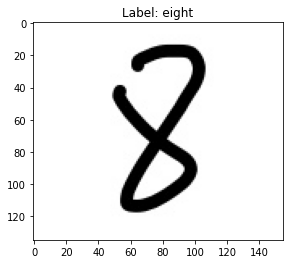

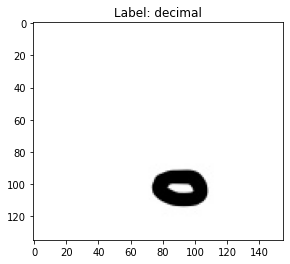

In [9]:
### testing 

image = cv2.imread(train_image[140])
plt.imshow(image)
plt.title("Label: " + train_label[140])
plt.show()

image = cv2.imread(train_image[500])
plt.imshow(image)
plt.title("Label: " + train_label[500])
plt.show()

In [10]:
X_train = []
X_test = []

# loading the images & reshaping them
for path in train_image:    
    img = cv2.imread(path)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)
    X_train.append(img)

for path in test_image:    
    img = cv2.imread(path)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)     
    X_test.append(img)

# creating numpy array from the images
X_train = np.array(X_train)
X_test = np.array(X_test)

In [11]:
## normalizing the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (7557, 100, 100, 3)
X_test shape:  (1010, 100, 100, 3)


In [12]:
# now making the test

label_encoder = preprocessing.LabelEncoder() # for our 16 symbols
y_train_temp = label_encoder.fit_transform(train_label)
y_test_temp = label_encoder.fit_transform(test_label)


print("y_train_temp shape: ", y_train_temp.shape)
print("y_test_temp shape: ", y_test_temp.shape)

# creating matrix labels list
y_train = keras.utils.to_categorical(y_train_temp, 16)
y_test = keras.utils.to_categorical(y_test_temp, 16)


print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

y_train_temp shape:  (7557,)
y_test_temp shape:  (1010,)
y_train shape:  (7557, 16)
y_test shape:  (1010, 16)


In [13]:
# Creating the Sequential Model

In [14]:
# building it up layer by layer
model = Sequential()

# 1st layer and taking input in this of shape 100x100x3 ->  100 x 100 pixles and 3 channels
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(100, 100, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))

# maxpooling will take highest value from a filter of 2*2 shape
model.add(MaxPooling2D(pool_size=(2, 2)))

# it will prevent overfitting by making it hard for the model to idenify the images
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))

# last layer predicts 16 labels
model.add(Dense(16, activation="softmax"))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0

In [15]:
# Training of the model

In [18]:
# training the model
history = model.fit(
    X_train,
    y_train,
    batch_size=50,
    epochs=10,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/10
121/121 [==============================] - 179s 1s/step - loss: 0.2293 - accuracy: 0.9247 - val_loss: 19.6444 - val_accuracy: 0.1336
Epoch 2/10
121/121 [==============================] - 171s 1s/step - loss: 0.1560 - accuracy: 0.9492 - val_loss: 20.4826 - val_accuracy: 0.1402
Epoch 3/10
121/121 [==============================] - 170s 1s/step - loss: 0.1164 - accuracy: 0.9636 - val_loss: 24.5383 - val_accuracy: 0.1389
Epoch 4/10
121/121 [==============================] - 169s 1s/step - loss: 0.1073 - accuracy: 0.9643 - val_loss: 24.8623 - val_accuracy: 0.1415
Epoch 5/10
121/121 [==============================] - 168s 1s/step - loss: 0.1033 - accuracy: 0.9667 - val_loss: 23.1831 - val_accuracy: 0.1402
Epoch 6/10
121/121 [==============================] - 179s 1s/step - loss: 0.0653 - accuracy: 0.9783 - val_loss: 27.3926 - val_accuracy: 0.1409
Epoch 7/10
121/121 [==============================] - 166s 1s/step - loss: 0.0655 - accuracy: 0.9783 - val_loss: 21.2407 - val_accuracy:

In [19]:
# visualizing the outcome with some graphs

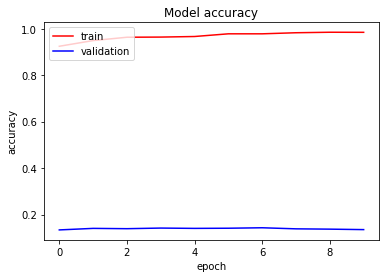

In [20]:
# displaying the accuracy
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

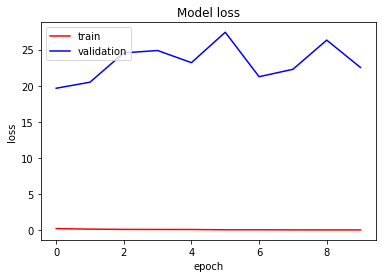

In [21]:
# displaying the loss
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [22]:
# printing out the final score of test & training data

In [23]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

32/32 [==============================] - 8s 241ms/step - loss: 4.0340 - accuracy: 0.8109
Test score: 4.034019947052002
Test accuracy: 0.8108910918235779


In [24]:
score, acc = model.evaluate(X_train, y_train)
print('Train score:', score)
print('Train accuracy:', acc)

237/237 [==============================] - 61s 254ms/step - loss: 4.5076 - accuracy: 0.8267
Train score: 4.507555961608887
Train accuracy: 0.8266507983207703


In [25]:
# some performance tests on the test set

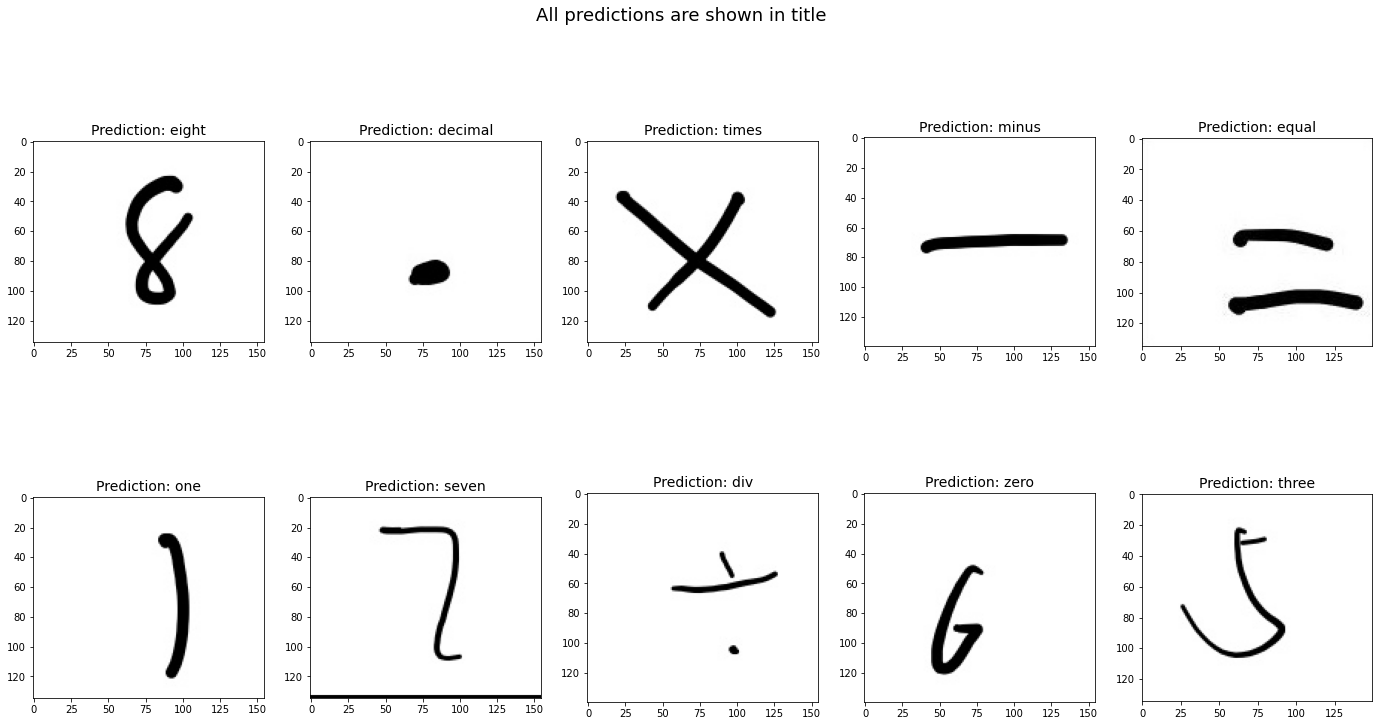

In [26]:
fig, axs= plt.subplots(2,5, figsize=[24,12])

count=0

for i in range(2):    
    for j in range(5):  
        
        image = cv2.imread(test_image[count + count*100])
        img = cv2.resize(image, (100, 100))        
        img = np.array(img)
        img = np.expand_dims(img, axis=0)
        img = img.astype('float32')
        img /= 255
        
        
        pred = model.predict(img)        
        result = np.argsort(pred)  
        result = result[0][::-1]

        final_label = label_encoder.inverse_transform(np.array(result))
                        
        axs[i][j].imshow(image)
        axs[i][j].set_title(str("Prediction: " + final_label[0]), fontsize = 14)        
        
        count += 1
        
plt.suptitle("All predictions are shown in title", fontsize = 18)        
plt.show()

In [27]:
# making the solver

In [28]:
## making the symbols to digits

In [29]:
def strToSymbol(pred):
    
    if pred == "zero":
        return 0    
    elif pred == "one":
        return 1
    elif pred == "two":
        return 2
    elif pred == "three":
        return 3
    elif pred == "four":
        return 4
    elif pred == "five":
        return 5
    elif pred == "six":
        return 6
    elif pred == "seven":
        return 7
    elif pred == "eight":
        return 8
    elif pred == "nine":
        return 9
    elif pred == "plus":
        return '+'
    elif pred == "minus":
        return '-'
    elif pred == "div":
        return '/'
    elif pred == "equal":
        return '='
    elif pred == "decimal":
        return '.'
    elif pred == "times":
        return '*'

## defining the calculations

def calculate(par1, sym, par2):
    if sym == "plus":
        return strToSymbol(par1) + strToSymbol(par2)
    elif sym == "minus":
        return strToSymbol(par1) - strToSymbol(par2)
    elif sym == "div":
        return strToSymbol(par1) / strToSymbol(par2)
    elif sym == "decimal":
        return str(par1 + sym + par2)
    elif sym == "times":
        return strToSymbol(par1) * strToSymbol(par2)

Width :  714  , Height :  302


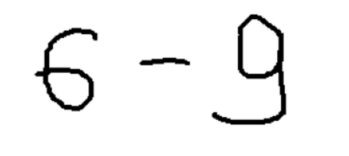

ValueError: in user code:

    /opt/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /opt/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/miniconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/miniconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/miniconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /opt/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /opt/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 3 but received input with shape (None, 100, 100, 4)


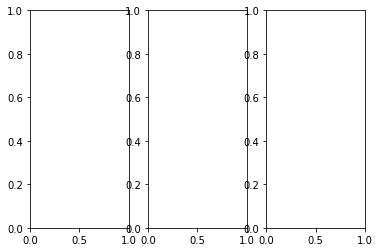

In [42]:
image = Image.open("./img/test3.png")

equation = []

width, height = image.size 
print("Width : " , width, " , Height : ", height)
plt.imshow(image)
plt.axis('off')
plt.show()

fig, axs= plt.subplots(1,3)
div = int(width/3)

for i in range(0,3):
    left = i * div
    top = 0
    right = (i+1) * div
    bottom = height 
    
    temp_img = image.crop((left, top, right, bottom))
    
    temp_img = temp_img.resize((100,100)) 
    img = np.array(temp_img)
    img = np.expand_dims(img, axis=0)
    img = img.astype('float32')
    img /= 255


    pred = model.predict(img)        
    result = np.argsort(pred)  
    result = result[0][::-1]

    final_label = label_encoder.inverse_transform(np.array(result))

    equation.append(final_label[0])

    axs[i].imshow(temp_img)
    axs[i].set_title(str("Prediction: " + final_label[0]), fontsize = 14)   

    plt.show()
    print(strToSymbol(equation[0]), strToSymbol(equation[1]) , strToSymbol(equation[2]), " = ", calculate(equation[0], equation[1] , equation[2]))